<a href="https://colab.research.google.com/github/IvanKatorgin/Feature-Engineering/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B0%D0%BC%D0%B8_%D0%B8_%D0%BF%D0%BE%D1%81%D1%82%D1%80%D0%BE%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D0%B5%D0%B9_%D0%B4%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Курс "Работа с признаками и построение моделей". Домашнее задание 6. Деревья решений. Каторгин И.П.

## Описание задания

В домашнем задании нужно решить задачу регрессии. В качестве датасета необходимо взять данные о недвижимости Калифорнии из библиотеки sklearn.datasets.

Скачать датасет также можно по ссылке
Целевая переменная – MedHouseVal. Прочитать информацию о признаках датасета можно, выполнив следующий код – print(fetch_california_housing().DESCR). На полученных данных построить модель регрессии и дерево решений.

Этапы работы:
1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую).
2. Проведите первичный анализ.

a.Проверьте данные на пропуски. Удалите в случае обнаружения.

b.*Нормализуйте один из признаков.
3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.
4. Обучите модель регрессии на обучающем множестве.
5. Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score.
6. Обучите дерево решений на обучающем множестве.

a. Повторите п. 5 для полученной модели.

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным. Посмотрите примеры визуализации по ссылке.
7. Оптимизируйте глубину дерева (max_depth). *Оптимизируйте ещё один параметр модели на выбор.

a. Повторите п. 5 для полученной модели.
8. Сформулируйте выводы по проделанной работе.

a. Сравните точность двух моделей.

b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

## Получите данные и загрузите их в рабочую среду

In [142]:
# загрузим необходимые библиотеки
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as st
from matplotlib import colors
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [143]:
# загрузим данные
df = pd.read_csv('ch.csv', sep=',', encoding='utf-8')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Проведите первичный анализ

In [144]:
# Проведем разведочный анализ данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [145]:
df.shape

(20640, 9)

In [146]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


a.Проверьте данные на пропуски. Удалите в случае обнаружения

In [147]:
# проверим данные на пропуски
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Пропусков в данных не обнаружено

Построим боксплоты для анализа распределения значений столбцов и поиска выбросов

In [148]:
# посроим несколько бокслотов
def get_boxplot(X, columns=[]):
  for i in columns:
    fig, axes = plt.subplots(1, 1, figsize=(8, 2))
    sns.boxplot(x=X[i])

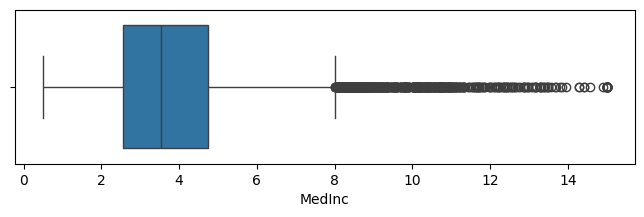

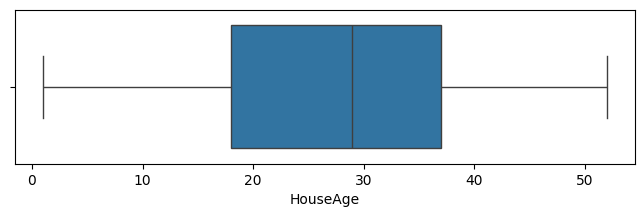

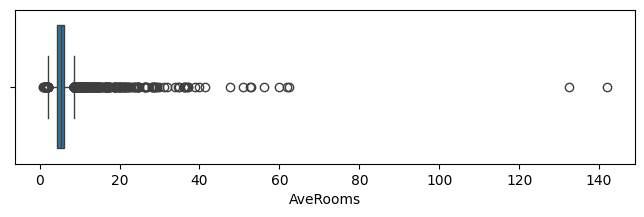

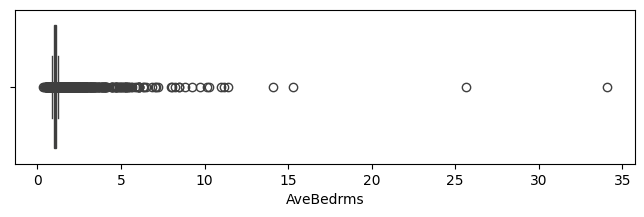

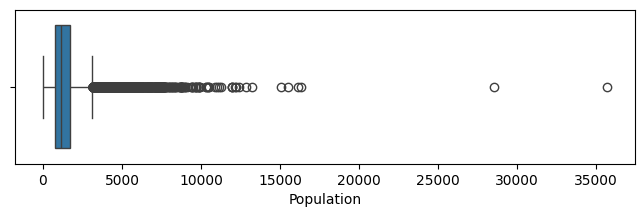

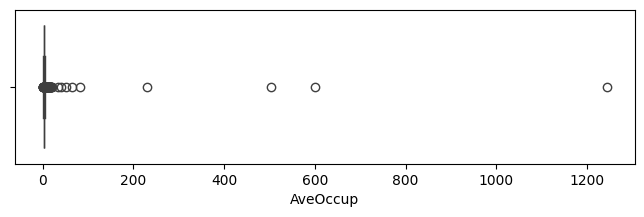

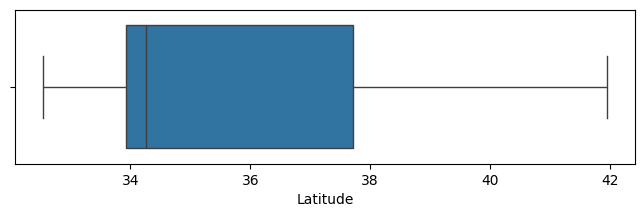

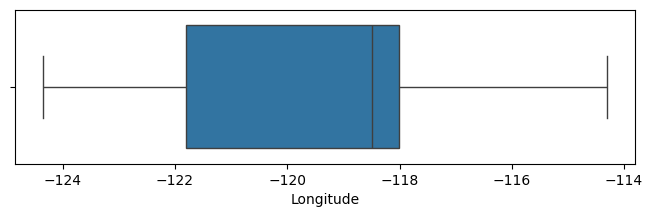

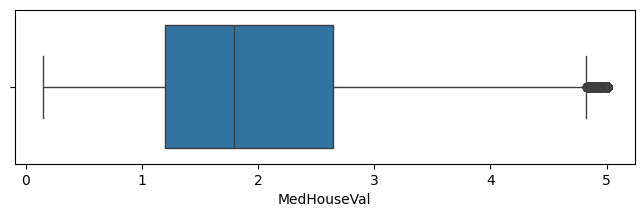

In [149]:
get_boxplot(df, columns=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'])

In [150]:
# посмотрим на значения столбца averooms больше 120
df[df['AveRooms'] > 120]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


In [151]:
# посмотрим на значения столбца population больше 25000
df[df['Population'] > 25000]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344


In [152]:
# посмотрим на значения столбца  aveoccup больше 200
df[df['AveOccup'] > 200]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


Имеются выбросы в признаках AveRooms, AveBedrms, Population и AveOccup. Удалим выбросы в данных

In [153]:
# удалим эти строки
df = df[(df['AveRooms'] < 120) & (df['Population'] < 25000) & (df['AveOccup'] < 200)]

b.*Нормализуйте один из признаков

In [154]:
# нормализуем один из признаков
df['MedInc'] = (df['MedInc'] - df['MedInc'].mean()) / df['MedInc'].std()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.345320,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,2.332791,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,1.783161,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,0.933289,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,-0.012716,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое

In [155]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']

In [156]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Обучите модель регрессии на обучающем множестве

In [157]:
# построим модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [158]:
model.coef_

array([ 8.25518936e-01,  9.93128875e-03, -1.07869904e-01,  6.77166656e-01,
        9.82348151e-06, -1.13061571e-01, -4.26343023e-01, -4.33218512e-01])

In [159]:
model.intercept_

-34.6620680911159

In [160]:
# выведем уравнение регрессии
print(f'Уравнение регрессии: y = {model.coef_[0]}*x1 + {model.coef_[1]}*x2 + ... + {model.intercept_}')

Уравнение регрессии: y = 0.8255189356695161*x1 + 0.009931288754866553*x2 + ... + -34.6620680911159


## Для тестового множества предскажите целевую переменную и сравните с истинным значением, посчитав точность предсказания модели. Для этого используйте встроенную функцию score

In [161]:
y_pred = model.predict(X_test)
y_pred

array([0.68661172, 2.28877836, 3.24155085, ..., 3.76040199, 2.19726395,
       2.64496447])

In [162]:
y_test

,MedHouseVal
13862,1.197
1710,1.578
9281,3.687
10790,4.070
19718,0.725
...,...
8263,2.200
20536,1.308
16022,3.941
2273,1.538


In [163]:
# посчитаем точность предсказания модели через score
model.score(X_test, y_test)

0.6150918474488851

## Обучите дерево решений на обучающем множестве

In [164]:
# обучим дерево решений на обучающем множестве
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

a. Повторите п. 5 для полученной модели

In [165]:
tree.predict(X_test)

array([1.18325955, 1.87097366, 3.75325634, ..., 3.75325634, 3.43137614,
       2.56699054])

In [166]:
# посчитаем точность предсказания модели через score
tree.score(X_test, y_test)

0.5102777538928451

b. Визуализируйте часть дерева решений. Убедитесь, что график получился читабельным

[Text(0.5, 0.875, 'x[0] <= 0.634\nsquared_error = 1.33\nsamples = 16505\nvalue = 2.068'),
 Text(0.25, 0.625, 'x[0] <= -0.419\nsquared_error = 0.829\nsamples = 13127\nvalue = 1.741'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 4.202\nsquared_error = 0.558\nsamples = 6295\nvalue = 1.357'),
 Text(0.0625, 0.125, 'squared_error = 0.677\nsamples = 2334\nvalue = 1.652'),
 Text(0.1875, 0.125, 'squared_error = 0.406\nsamples = 3961\nvalue = 1.183'),
 Text(0.375, 0.375, 'x[5] <= 2.414\nsquared_error = 0.819\nsamples = 6832\nvalue = 2.094'),
 Text(0.3125, 0.125, 'squared_error = 1.233\nsamples = 1789\nvalue = 2.722'),
 Text(0.4375, 0.125, 'squared_error = 0.483\nsamples = 5043\nvalue = 1.871'),
 Text(0.75, 0.625, 'x[0] <= 1.553\nsquared_error = 1.235\nsamples = 3378\nvalue = 3.343'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 2.746\nsquared_error = 0.9\nsamples = 2313\nvalue = 2.924'),
 Text(0.5625, 0.125, 'squared_error = 0.991\nsamples = 955\nvalue = 3.431'),
 T

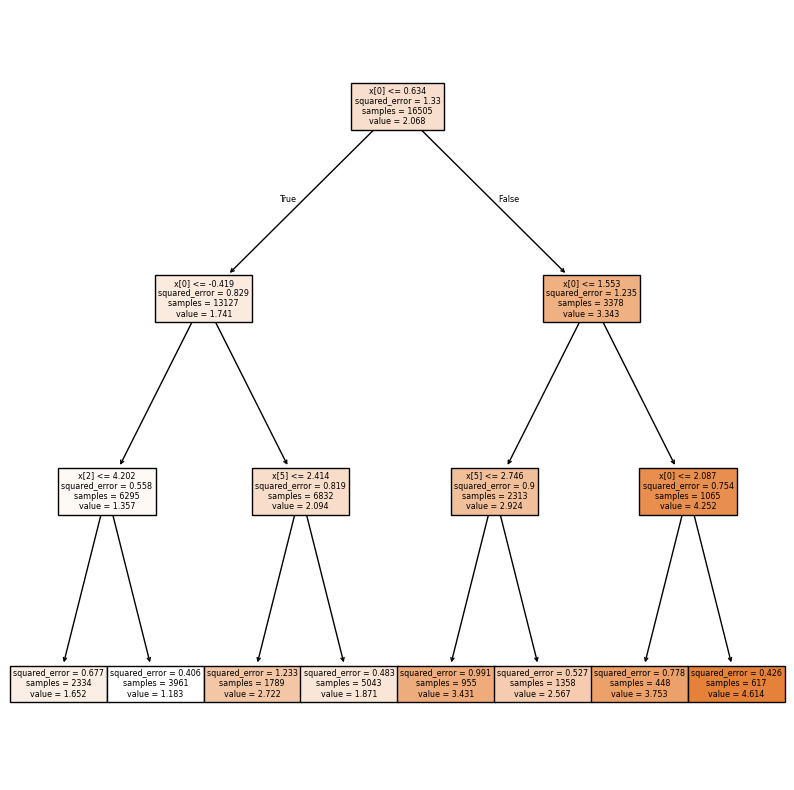

In [167]:
# визуализируем модель
plt.figure(figsize=(10, 10))
plot_tree(tree, filled=True)

## Оптимизируйте глубину дерева (max_depth)

*Оптимизируйте ещё один параметр модели на выбор

In [168]:
# удалим признаки AveRooms и latitude
df = df.drop(['AveRooms','Latitude'], axis=1)
df

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Longitude,MedHouseVal
0,2.345320,41.0,1.023810,322.0,2.555556,-122.23,4.526
1,2.332791,21.0,0.971880,2401.0,2.109842,-122.22,3.585
2,1.783161,52.0,1.073446,496.0,2.802260,-122.24,3.521
3,0.933289,52.0,1.073059,558.0,2.547945,-122.25,3.413
4,-0.012716,52.0,1.081081,565.0,2.181467,-122.25,3.422
...,...,...,...,...,...,...,...
20635,-1.216162,25.0,1.133333,845.0,2.560606,-121.09,0.781
20636,-0.691540,18.0,1.315789,356.0,3.122807,-121.21,0.771
20637,-1.142615,17.0,1.120092,1007.0,2.325635,-121.22,0.923
20638,-1.054590,18.0,1.171920,741.0,2.123209,-121.32,0.847


In [169]:
# сформируем матрицу признаков X и вектор целевых переменных y
X = df.drop(['MedHouseVal'], axis=1)
y = df['MedHouseVal']

In [170]:
# разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [171]:
# оптимизируем глубину дерева
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

a. Повторите п. 5 для полученной модели

In [172]:
tree.predict(X_test)

array([1.44697181, 2.06659975, 3.41733543, ..., 4.25807603, 3.62592271,
       2.30734477])

In [173]:
# посчитаем точность предсказания модели через score
tree.score(X_test, y_test)

0.5479729571107879

[Text(0.5, 0.9, 'x[0] <= 0.634\nsquared_error = 1.33\nsamples = 16505\nvalue = 2.068'),
 Text(0.25, 0.7, 'x[0] <= -0.419\nsquared_error = 0.829\nsamples = 13127\nvalue = 1.741'),
 Text(0.375, 0.8, 'True  '),
 Text(0.125, 0.5, 'x[4] <= 2.161\nsquared_error = 0.558\nsamples = 6295\nvalue = 1.357'),
 Text(0.0625, 0.3, 'x[0] <= -0.752\nsquared_error = 1.088\nsamples = 939\nvalue = 1.882'),
 Text(0.03125, 0.1, 'squared_error = 0.985\nsamples = 520\nvalue = 1.607'),
 Text(0.09375, 0.1, 'squared_error = 1.006\nsamples = 419\nvalue = 2.223'),
 Text(0.1875, 0.3, 'x[5] <= -118.785\nsquared_error = 0.408\nsamples = 5356\nvalue = 1.265'),
 Text(0.15625, 0.1, 'squared_error = 0.369\nsamples = 2734\nvalue = 1.091'),
 Text(0.21875, 0.1, 'squared_error = 0.384\nsamples = 2622\nvalue = 1.447'),
 Text(0.375, 0.5, 'x[4] <= 2.414\nsquared_error = 0.819\nsamples = 6832\nvalue = 2.094'),
 Text(0.3125, 0.3, 'x[1] <= 24.5\nsquared_error = 1.233\nsamples = 1789\nvalue = 2.722'),
 Text(0.28125, 0.1, 'squared_er

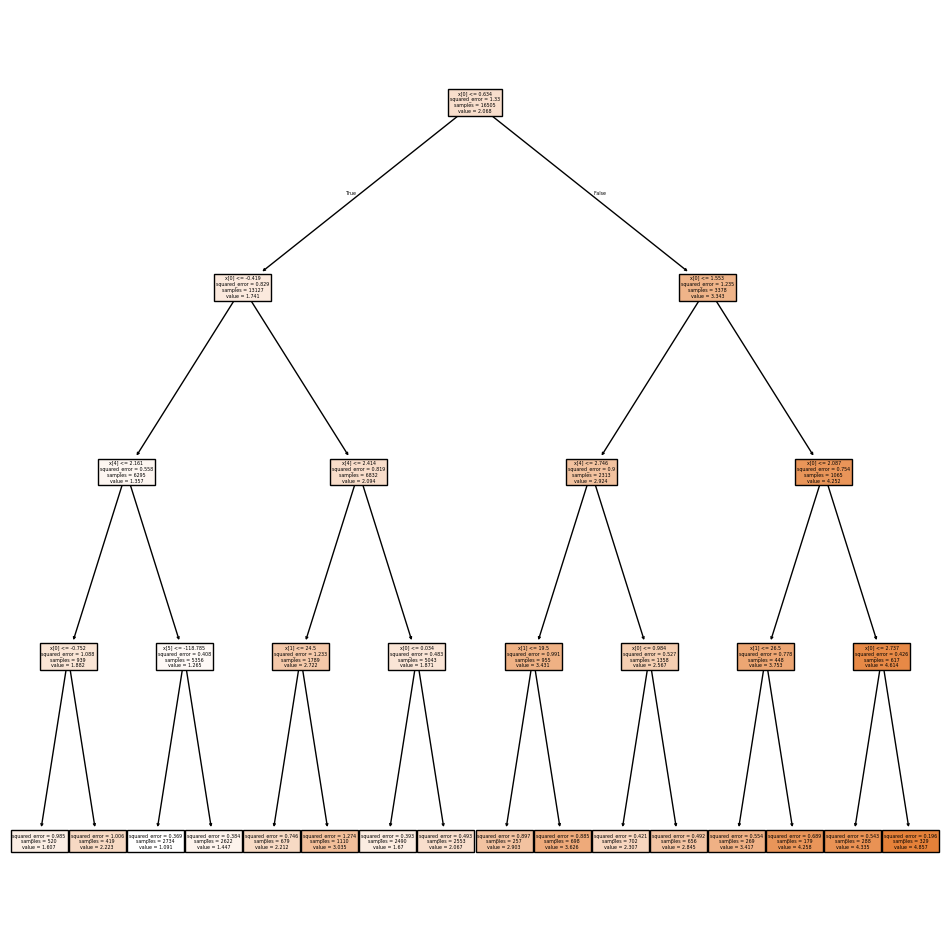

In [174]:
# визуализируем модель
plt.figure(figsize=(12, 12))
plot_tree(tree, filled=True)

In [175]:
# еще раз оптимизируем глубину дерева
tree = DecisionTreeRegressor(max_depth=8)
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

a. Повторите п. 5 для полученной модели

In [176]:
tree.predict(X_test)

array([1.23938043, 1.93369543, 3.654     , ..., 4.15631   , 3.57592866,
       2.32080181])

In [177]:
# посчитаем точность предсказания модели через score
tree.score(X_test, y_test)

0.6446712253414615

## Сформулируйте выводы по проделанной работе

a. Сравните точность двух моделей.

- Точность модели линейной регресси составила 0.615
- Точность модели дерева решений до оптимизации 0.510
- Точность дерева решений после оптимизции и увеличения глубины составила 0,547
- Точность дерева после еще большего увеличения глубины составила 0,644

Таким образом, точность более простой модели линейной регрессии без какой-либо оптимизации оказалась значительно выше точности дерева решений. И только после нескольких итераций увеличения глубины дерева и оптимизаций признаков, его точность увеличилась в сравнении с линейной регрессией.


b. Напишите свое мнение, для каких задач предпочтительнее использовать обученные в работе модели? Какие у них есть плюсы и минусы?

В данном датасете дерево решений показало лучший результат, чем линейная регрессия, только после значительного увеличения глубины и удаления признаков. Таким образом, при различной глубине, точность может оказаться либо лучше, либо хуже. Это означает, что абсолютного преимущества перед моделью линейной регрессии дерево решений не имеет. Один из плюсов дерева решений в том, что оно позволяет смешивать категориальные и числовые признаки. Таким образом, подводя итог, можно сказать, что дерево решений удобно использовать, когда исследуемый датасет нам незнаком и мы не можем сделать каких-либо надежных выводов и предположений. В этом случае дерево позволит быстрого получить удовлетворительную модель и в дальнейшем отталкиваться от нее